In [1]:
import random
import math
from matplotlib import pyplot as plt
import numpy as np


In [5]:
class ParamsOptimizer:
    def __init__(self) -> None:
        self.x1 = 0
        self.x2 = 0
        self.x3 = 0
        self.last_base_params = {
            "freq_b": 1750,
            "freq_t": 8500,
            "dur": 20,
            "reward": None,
            "freq_b_grad": 0,
            "freq_t_grad": 0,
            "dur_grad": 0,
            "freq_b_step": 100,
            "freq_t_step": 100,
            "dur_step": 10,
            "direction": 1,
            "param_n": None,
        }

        self.params = {
            "freq_b": 1750,
            "freq_t": 8500,
            "dur": 20,
            "reward": 0,
            "freq_b_grad": 0,
            "freq_t_grad": 0,
            "dur_grad": 0,
            "freq_b_step": 10000,
            "freq_t_step": 10000,
            "dur_step": 10000,
            "param_n": 0,
        }

        self.rate = 10000

        self.target = 1  # min -1 / max 1

    @staticmethod
    def __limit_value(value, min_value=0, max_value=20000):
        if value > max_value:
            return max_value
        elif value < min_value:
            return min_value
        return value

    def make_step(self, sound_type, new_reward):
        params = self.class_params[sound_type]

        if params["param_n"] == None:
            params["reward"] = new_reward
            params["freq_b"].append(
                self.__limit_value(
                    params["freq_b"][-1] + params["freq_b_step"],
                    max_value=params["freq_t"][-1] + 1,
                )
            )
            params["param_n"] = 0
            return

        if params["param_n"] % 3 == 0:
            params["freq_b_grad"] = self.target * (new_reward - params["reward"])
            params["freq_b"].pop()
            params["freq_t"].append(
                self.__limit_value(
                    params["freq_t"][-1] + params["freq_t_step"],
                    min_value=params["freq_b"][-1] + 1,
                    max_value=20000,
                )
            )
        elif params["param_n"] % 3 == 1:
            params["freq_t_grad"] = self.target * (new_reward - params["reward"])
            params["freq_t"].pop()
            params["dur"].append(
                self.__limit_value(
                    params["dur"][-1] + params["dur_step"], min_value=10, max_value=975
                )
            )
        elif params["param_n"] % 3 == 2:
            params["dur_grad"] = self.target * (new_reward - params["reward"])
            params["dur"].pop()

            print("/________________________________________________________________/")
            print(
                "Step values: ",
                params["freq_b_step"],
                params["freq_t_step"],
                params["dur_step"],
            )
            print(
                "Grad: ",
                params["freq_b_grad"],
                params["freq_t_grad"],
                params["dur_grad"],
            )
            print("Target: ", self.x1, self.x2, self.x3)

            print(
                "Old params: ",
                params["freq_b"][-1],
                params["freq_t"][-1],
                params["dur"][-1],
            )
            params["freq_b"].append(
                self.__limit_value(
                    params["freq_b"][-1] + self.rate * params["freq_b_grad"],
                    max_value=params["freq_t"][-1] + 1,
                )
            )
            params["freq_t"].append(
                self.__limit_value(
                    params["freq_t"][-1] + self.rate * params["freq_t_grad"],
                    min_value=params["freq_b"][-1] + 1,
                    max_value=20000,
                )
            )
            params["dur"].append(
                self.__limit_value(
                    params["dur"][-1] + self.rate * params["dur_grad"],
                    min_value=10,
                    max_value=975,
                )
            )

            print(
                "New params: ",
                params["freq_b"][-1],
                params["freq_t"][-1],
                params["dur"][-1],
            )

            if params["freq_b_grad"] < 0:
                params["freq_b_step"] /= 2
            if params["freq_t_grad"] < 0:
                params["freq_t_step"] /= 2
            if params["dur_grad"] < 0:
                params["dur_step"] /= 2

            params["reward"] = 0
            params["param_n"] = None
            return

        params["param_n"] = params["param_n"] + 1

    def analyze(self, sound_type, reward=None):
        params = self.class_params[sound_type]
        reward = (
            reward
            or -math.sqrt(
                (params["freq_b"][-1] - self.x1) ** 2
                + (params["freq_t"][-1] - self.x2) ** 2
                + (params["dur"][-1] - self.x3) ** 2
            )
            / 28302
            * 3
            + random.random() * 0.01
        )
        print(reward)
        self.make_step(sound_type, reward)
        return reward


In [6]:
optimizer = ParamsOptimizer()
optimizer.x1 = 4000
optimizer.x2 = 17000
optimizer.x3 = 120

for i in range(80):
    optimizer.analyze("music")
    if i % 28 == 3 and i // 84 >= 1:
        optimizer.class_params["music"]["freq_b_step"] = 100
        optimizer.class_params["music"]["freq_t_step"] = 100
        optimizer.class_params["music"]["dur_step"] = 100


-0.9276116268793013
-1.0121897948652514
-0.27763441774086767
-0.934822389901819
/________________________________________________________________/
Step values:  10000 10000 10000
Grad:  -0.08457816798595008 0.6499772091384337 -0.007210763022517663
Target:  4000 17000 120
Old params:  1750 8500 20
New params:  904.2183201404991 14999.772091384337 10
-0.38164561195844576
-0.28620281611878756
-0.4485198010971502
-0.3937174933418673
/________________________________________________________________/
Step values:  5000.0 10000 5000.0
Grad:  0.0954427958396582 -0.06687418913870441 -0.012071881383421523
Target:  4000 17000 120
Old params:  904.2183201404991 14999.772091384337 10
New params:  1858.6462785370811 14331.030199997293 10
-0.361303465527895
-0.40758728495142843
-0.32745909513883903
-0.36872802846652425
/________________________________________________________________/
Step values:  5000.0 5000.0 2500.0
Grad:  -0.046283819423533434 0.03384437038905597 -0.007424562938629253
Target:  40

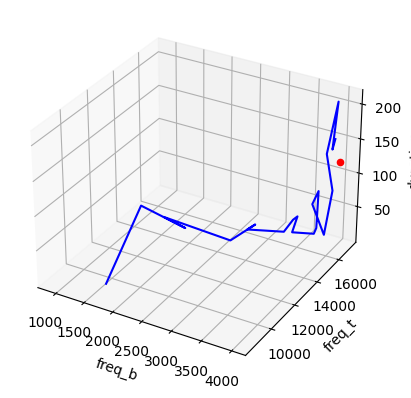

In [7]:
def draw(x1_hist, x2_hist, x3_hist, x1, x2, x3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot3D(x1_hist, x2_hist, x3_hist, "b")
    ax.set_xlabel("freq_b")
    ax.set_ylabel("freq_t")
    ax.set_zlabel("duration")

    ax.scatter(x1, x2, x3, c="red")
    return plt.show()


draw(
    optimizer.class_params["music"]["freq_b"][:64],
    optimizer.class_params["music"]["freq_t"][:64],
    optimizer.class_params["music"]["dur"][:64],
    optimizer.x1,
    optimizer.x2,
    optimizer.x3,
)


In [84]:
class ParamsOptimizer:
    def __init__(self) -> None:
        self.x1 = 0
        self.x2 = 0
        self.x3 = 0
        self.last_base_params = {
            "freq_b": 1750,
            "freq_t": 8500,
            "dur": 20,
            "reward": 0,
            "freq_b_grad": 0,
            "freq_t_grad": 0,
            "dur_grad": 0,
            "freq_b_step": 100,
            "freq_t_step": 100,
            "dur_step": 10,
            "direction": 1,
            "param_n": 0,
        }
        self.params = {
            "freq_b": [
                1750,
            ],
            "freq_t": [
                8500,
            ],
            "dur": [
                20,
            ],
            "reward": 0,
            "freq_b_grad": 0,
            "freq_t_grad": 0,
            "dur_grad": 0,
            "freq_b_step": 100,
            "freq_t_step": 100,
            "dur_step": 10,
            "direction": 1,
            "param_n": 0,
        }

    def make_step(self, sound_type, new_reward):
        params = self.class_params[sound_type]

        if not params["reward"]:
            params["reward"] = new_reward
            params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
            return

        if params["param_n"] % 3 == 0:
            params["freq_b_grad"] = -(new_reward - params["reward"])
            params["freq_b"].pop()
            params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        elif params["param_n"] % 3 == 1:
            params["freq_t_grad"] = -(new_reward - params["reward"])
            params["freq_t"].pop()
            params["dur"].append(params["dur"][-1] + params["dur_step"])
        elif params["param_n"] % 3 == 2:
            params["dur_grad"] = -(new_reward - params["reward"])
            params["dur"].pop()

            print(params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"])

            direction = np.argmax(
                [params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"]]
            )
            # params["freq_b"].append(params["freq_b"][-1] + 50*params["freq_b_grad"])
            # params["freq_t"].append(params["freq_t"][-1] + 50*params["freq_t_grad"])
            # params["dur"].append(params["dur"][-1] + 10*params["dur_grad"])

            if direction == 0:
                params["freq_b"].append(
                    params["freq_b"][-1]
                    + params["freq_b_step"] * np.sign(params["freq_b_grad"])
                )
                params["freq_t"].append(params["freq_t"][-1])
                params["dur"].append(params["dur"][-1])
                if params["freq_b_grad"] < 0:
                    params["freq_b_step"] /= 2
            elif direction == 1:
                params["freq_t"].append(
                    params["freq_t"][-1]
                    + params["freq_t_step"] * np.sign(params["freq_t_grad"])
                )
                params["freq_b"].append(params["freq_b"][-1])
                params["dur"].append(params["dur"][-1])
                if params["freq_t_grad"] < 0:
                    params["freq_t_step"] /= 2
            elif direction == 2:
                params["dur"].append(
                    params["dur"][-1] + params["dur_step"] * np.sign(params["dur_grad"])
                )
                params["freq_t"].append(params["freq_t"][-1])
                params["freq_b"].append(params["freq_b"][-1])
                if params["dur_grad"] < 0:
                    params["dur_step"] /= 2

            print(params["freq_b"][-1], params["freq_t"][-1], params["dur"][-1])

            params["reward"] = 0

        params["param_n"] = params["param_n"] + 1

        # grad = -(new_reward - params["reward"][-1])
        # params["reward"].append(new_reward)

        # grad_sign = 1 if grad > 0 else -1
        # if grad_sign == -1:
        #     params["direction"] = -params["direction"]
        #     if params["param_n"] % 3 == 0:
        #         params["freq_b_step"] /= 2
        #     if params["param_n"] % 3 == 1:
        #         params["freq_t_step"] /= 2
        #     if params["param_n"] % 3 == 2:
        #         params["dur_step"] /= 2

        # if params["param_n"] % 3 == 2:
        #     params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
        # elif params["param_n"] % 3 == 0:
        #     params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        # elif params["param_n"] % 3 == 1:
        #     params["dur"].append(params["dur"][-1] + params["dur_step"])

    def analyze(self, sound_type, reward=None):
        params = self.class_params[sound_type]
        reward = reward or math.sqrt(
            (params["freq_b"][-1] - self.x1) ** 2
            + (params["freq_t"][-1] - self.x2) ** 2
            + (params["dur"][-1] - self.x3) ** 2
        )

        self.make_step(sound_type, reward)
        return reward
